In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\bzhang\Desktop\155BlenderDataOct26.csv")

In [3]:
data.dropna(axis = 0,inplace = True)

In [4]:
data.Time = data.Time.astype(str)

In [5]:
data.iloc[:,4:7]=data.iloc[:,4:7].diff(axis = 0)/5*1000

In [6]:
data.iloc[:,9::]=data.iloc[:,9::].diff(axis = 0)/5*1000

In [7]:
data.Time = data.Time.apply(lambda x: x[5::])

In [8]:
GSM = pd.concat([data.iloc[:,0:2],data.iloc[:,4:7],data.iloc[:,9::]],axis = 1)

In [9]:
GSM.iloc[:,2::] = GSM.iloc[:,2::].apply(lambda x: x/GSM.Line_Speed/1.855, axis = 0)

In [10]:
GSM['ExtA_GSM'] = GSM.iloc[:,2:5].sum(axis = 1)
GSM['ExtB_GSM'] = GSM.iloc[:,5::].sum(axis = 1)

In [11]:
GSM['Total GSM'] = GSM['ExtA_GSM']+GSM['ExtB_GSM']

In [12]:
import matplotlib.pyplot as plt

In [13]:
GSM['Total GSM'][GSM['Total GSM']>=43.]=45

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
GSM.dropna(axis = 0,inplace = True)

Text(0, 0.5, 'Coating GSM')

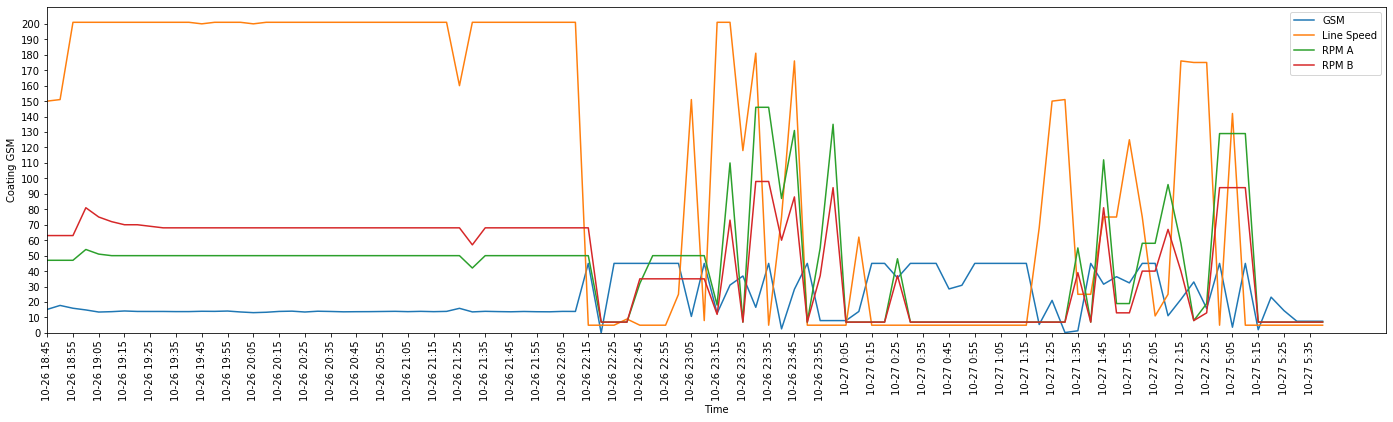

In [20]:
plt.figure(figsize=(24,6))
plt.plot(GSM.Time[:100],GSM['Total GSM'][:100])
plt.plot(GSM.Time[:100],GSM['Line_Speed'][:100])
plt.plot(GSM.Time[:100],data['Screw_Speed_ExtA'][:100])
plt.plot(GSM.Time[:100],data['Screw_Speed_ExtB'][:100])

plt.xticks(GSM.Time[:100][::2],rotation = 'vertical', fontsize = 10);
plt.yticks(range(0,210,10), fontsize = 10);

plt.xlim(0);
plt.ylim(0)
plt.legend(['GSM','Line Speed','RPM A','RPM B'])
plt.xlabel("Time")
plt.ylabel("Coating GSM")

In [39]:
data

,Time,Line_Speed,Screw_Speed_ExtA,Head_Pressure_ExtA,ExtA_Hopper_A,ExtA_Hopper_B,ExtA_Hopper_C,Screw_Speed_ExtB,Head_Pressure_ExtB,ExtB_Hopper_A,ExtB_Hopper_B,ExtB_Hopper_C
0,10-26 18:40,150,47,2189,NaN,NaN,NaN,63,1057,NaN,NaN,NaN
1,10-26 18:45,150,47,2211,33.826,1112.0,545.90,63,1052,25.6322,622.0,205.540
2,10-26 18:50,151,47,2206,42.204,1392.0,674.78,63,1046,25.6020,560.0,179.954
3,10-26 18:55,201,54,2345,51.772,1656.0,824.56,81,1222,29.7700,648.0,212.032
4,10-26 19:00,201,51,2275,45.638,1510.0,736.04,75,1163,19.9860,712.0,230.302
5,10-26 19:05,201,50,2248,43.454,1398.0,688.62,72,1133,20.9800,574.0,184.756
6,10-26 19:10,201,50,2252,42.738,1418.0,683.36,70,1115,22.4040,618.0,200.380
7,10-26 19:15,201,50,2246,45.602,1464.0,716.14,70,1123,25.6780,618.0,200.780
8,10-26 19:20,201,50,2249,43.660,1432.0,695.38,69,1104,23.6920,618.0,199.680
9,10-26 19:25,201,50,2242,45.964,1458.0,710.32,68,1099,28.6840,544.0,176.080


In [ ]:
dat